In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
titanic_data = pd.read_csv('./titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.rename(columns={
    'PassengerId': 'passenger_id',
    'Survived': 'survived',
    'Pclass': 'pclass',
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'SibSp': 'siblings_spouses',
    'Parch': 'parents_children',
    'Ticket': 'ticket',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarked',
    }, inplace=True)

In [7]:
titanic_data.head()

,passenger_id,survived,pclass,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
incorrect_data = titanic_data[['passenger_id', 'name', 'ticket']].copy()
incorrect_data.head()

,passenger_id,name,ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450


In [13]:
titanic_data.drop(columns=['passenger_id', 'name', 'ticket'], inplace=True)

In [14]:
titanic_data.head()

,survived,pclass,sex,age,siblings_spouses,parents_children,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [66]:
cabin_survived = titanic_data.groupby('cabin', as_index=False).aggregate({
    'survived': ['mean', 'count', 'sum']
}).sort_values(by=('survived', 'sum'), ascending=False,)

In [79]:
cabin_survived.head()
cabin_survived['count'].sum()

np.int64(204)

In [68]:
cabin_survived['percent'] = cabin_survived['survived', 'sum'] /  cabin_survived['survived', 'count'] * 100

In [ ]:
cabin_survived.head()

cabin      147
mean       147
count      147
sum        147
percent    147
dtype: int64

In [72]:
cabin_survived.columns = ['cabin', 'mean', 'count', 'sum', 'percent']
cabin_survived

,cabin,mean,count,sum,percent
47,B96 B98,1.0,4,4,100.0
116,E101,1.0,3,3,100.0
142,F33,1.0,3,3,100.0
63,C23 C25 C27,0.5,4,2,50.0
71,C52,1.0,2,2,100.0
...,...,...,...,...,...
67,C46,0.0,1,0,0.0
64,C30,0.0,1,0,0.0
59,C128,0.0,1,0,0.0
56,C124,0.0,2,0,0.0


In [75]:
cabin_survived.groupby('count').aggregate({
    "percent": 'mean',
    'count': 'sum'
})

,percent,count
count,,
1,57.425743,101
2,77.631579,76
3,73.333333,15
4,66.666667,12


In [87]:
titanic_data.nunique(), titanic_data.count()

(survived              2
 pclass                3
 sex                   2
 age                  88
 siblings_spouses      7
 parents_children      7
 fare                248
 cabin               147
 embarked              3
 dtype: int64,
 survived            891
 pclass              891
 sex                 891
 age                 714
 siblings_spouses    891
 parents_children    891
 fare                891
 cabin               204
 embarked            889
 dtype: int64)

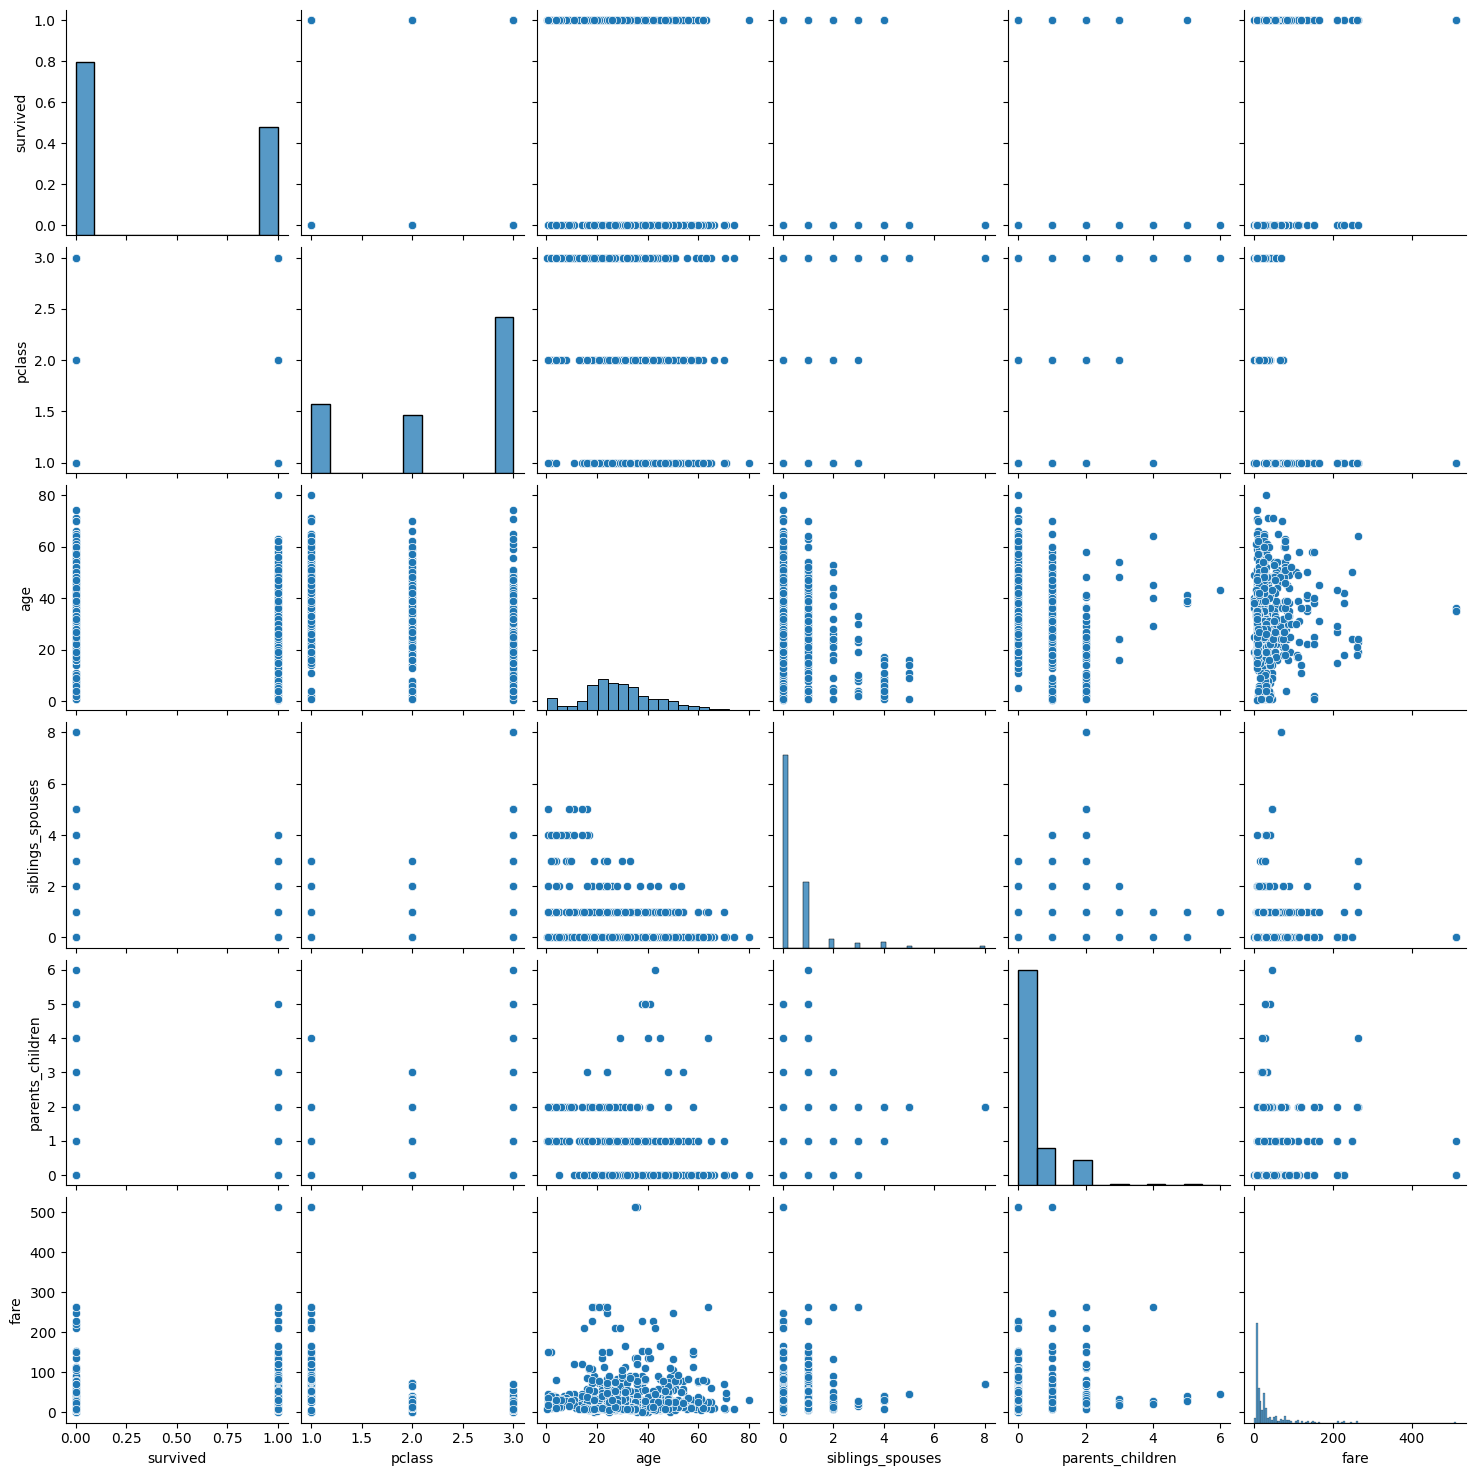

In [90]:
sns.pairplot(titanic_data)

<Axes: xlabel='survived', ylabel='Count'>

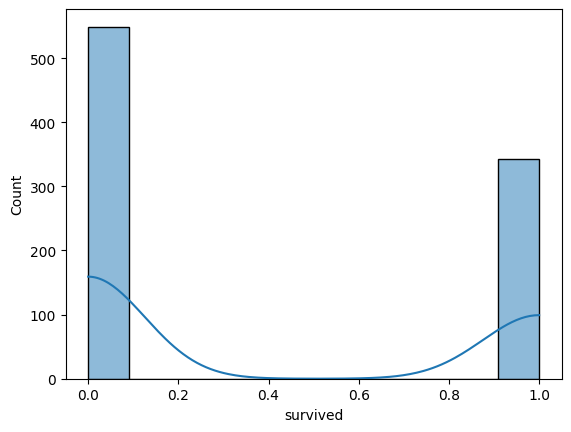

In [93]:
sns.histplot(data=titanic_data, x='survived', kde=True)

<Axes: xlabel='sex', ylabel='survived'>

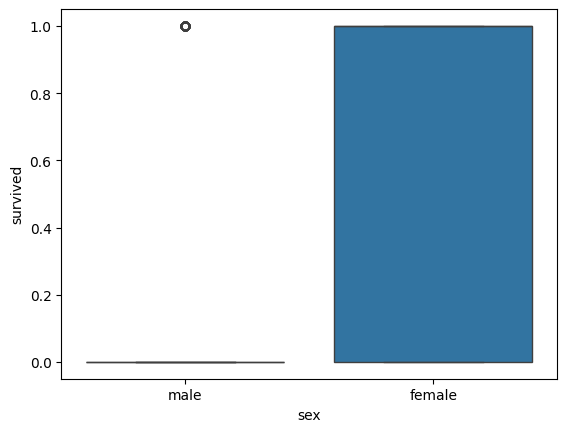

In [95]:
sns.boxplot(data=titanic_data, x='sex', y='survived')

<Axes: xlabel='cabin', ylabel='survived'>

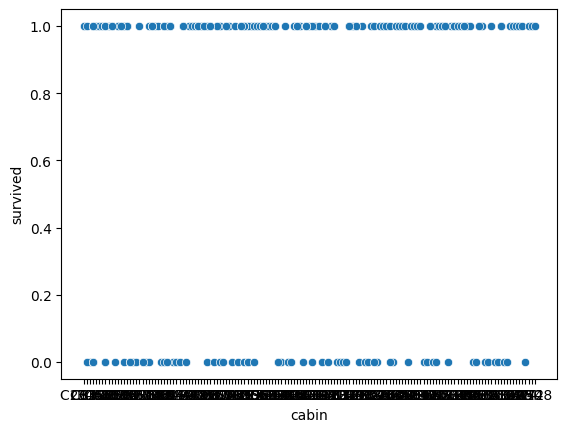

In [96]:
sns.scatterplot(data=titanic_data, x='cabin', y='survived')

<Axes: xlabel='age', ylabel='Count'>

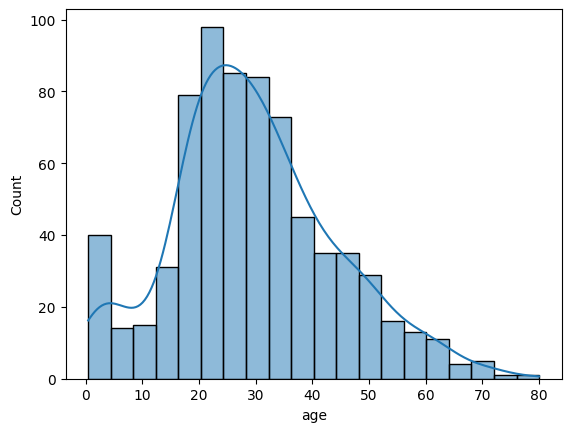

In [98]:
sns.histplot(titanic_data['age'].dropna(), kde=True)

In [99]:
titanic_data.describe()

,survived,pclass,age,siblings_spouses,parents_children,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          891 non-null    int64  
 1   pclass            891 non-null    int64  
 2   sex               891 non-null    object 
 3   age               714 non-null    float64
 4   siblings_spouses  891 non-null    int64  
 5   parents_children  891 non-null    int64  
 6   fare              891 non-null    float64
 7   cabin             204 non-null    object 
 8   embarked          889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
titanic_data.isnull().sum()

survived              0
pclass                0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
fare                  0
cabin               687
embarked              2
dtype: int64

In [105]:
titanic_data.nunique()

survived              2
pclass                3
sex                   2
age                  88
siblings_spouses      7
parents_children      7
fare                248
cabin               147
embarked              3
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

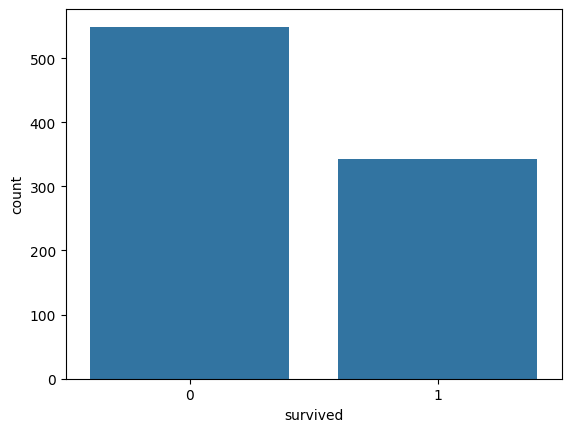

In [106]:
sns.countplot(x='survived', data=titanic_data)

<Axes: xlabel='sex', ylabel='survived'>

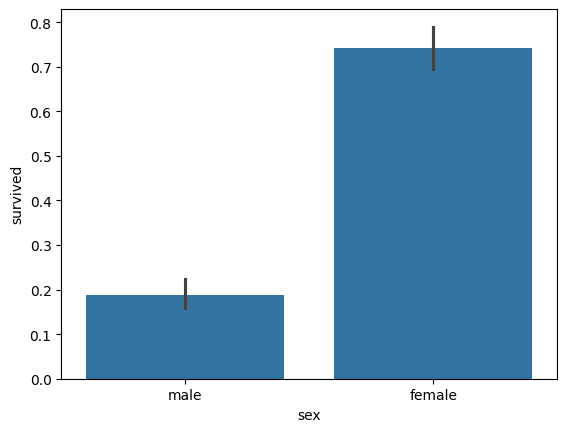

In [107]:
sns.barplot(x='sex', y='survived', data=titanic_data)

<Axes: xlabel='pclass', ylabel='survived'>

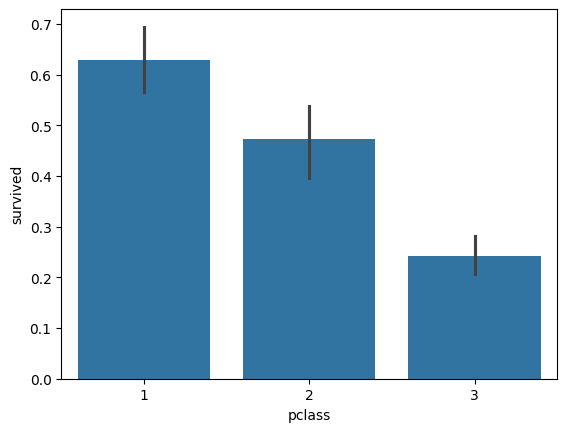

In [108]:
sns.barplot(x='pclass', y='survived', data=titanic_data)

<Axes: xlabel='survived', ylabel='age'>

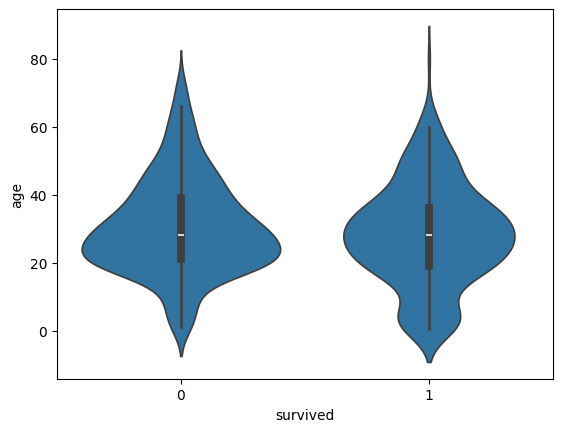

In [109]:
sns.violinplot(x='survived', y='age', data=titanic_data)

<Axes: >

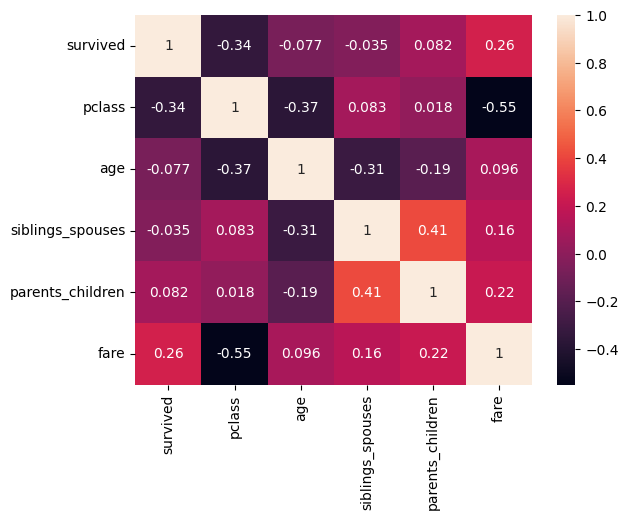

In [114]:
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True)

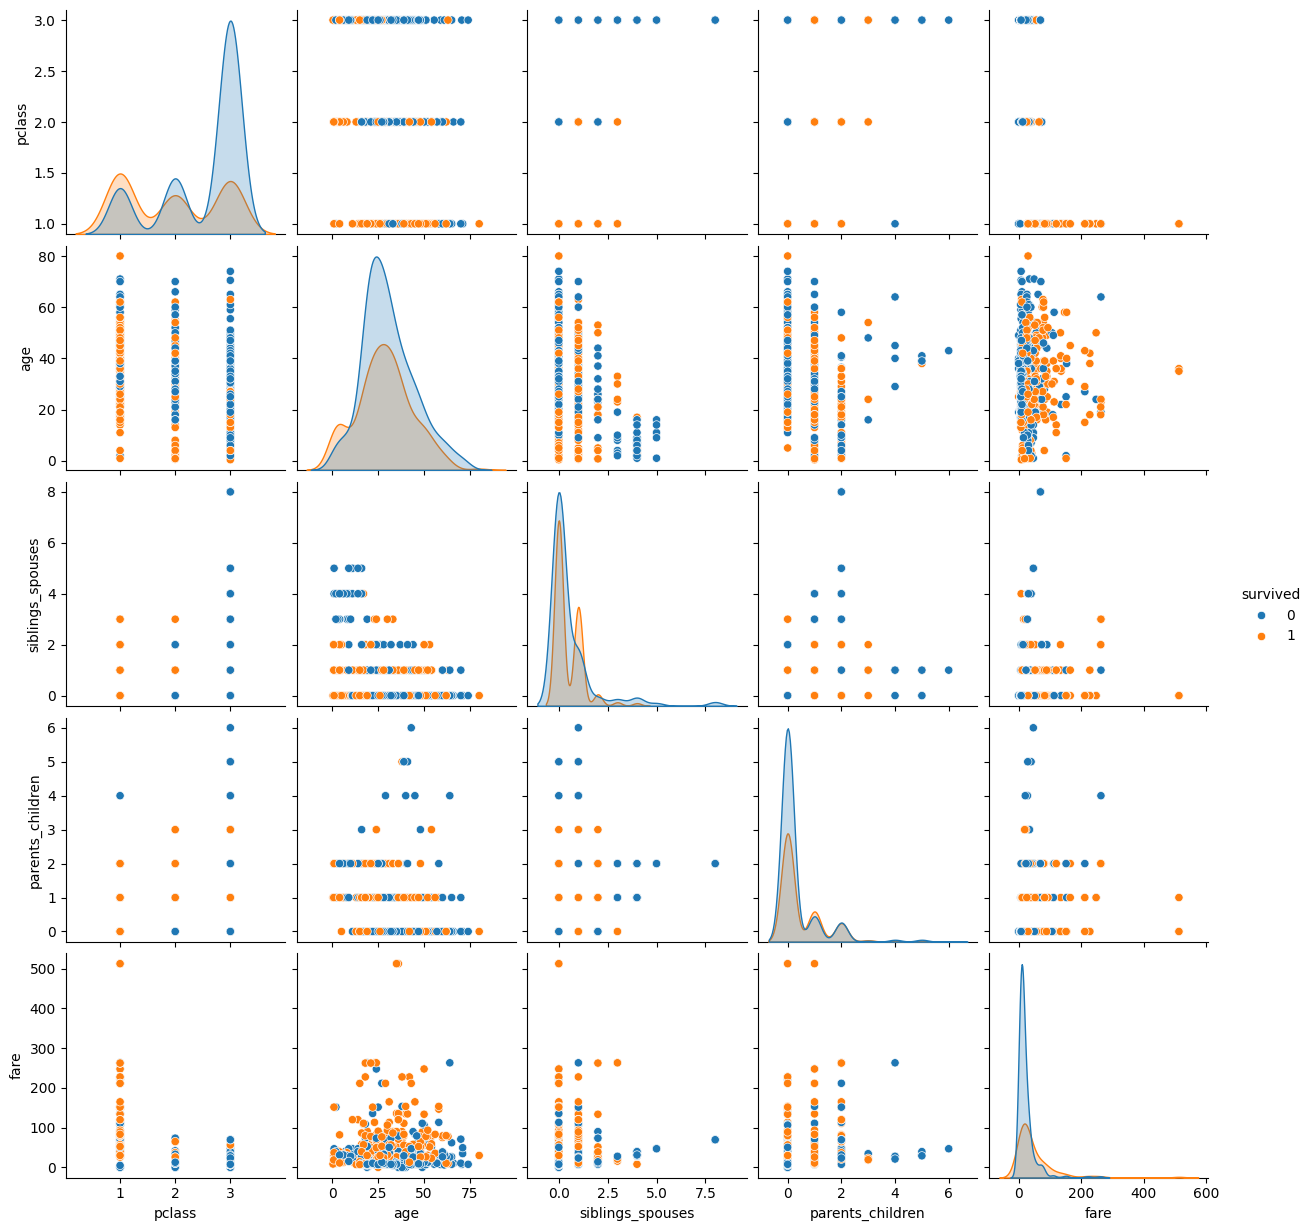

In [115]:
sns.pairplot(titanic_data, hue='survived')